**Importing Libraries**


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pytreands = TrendReq(hl='en-US', tz=360, timeout=(10,25)) 
keyword = "AI" # defining the keyword that would be searched in the Google

- hl = language, Select the language you want.

- tz means time-zone i'll choose 360 because it for the india.


# Sending the Data Request to Google to get the Data


In [3]:
pytreands.build_payload([keyword], cat=0, timeframe='today 12-m', geo='', gprop='')

**Some Information about above line**

- **cat :** category (that means when i above i define the keyword 'AI' that keyword i want in the all category that's why i choose cat = 0)

- **timeframe :** that means how much previous data you want like 1 month, 2 month, etc.. i need from today(31-05-2025) to last 12 months.

- **geo :** i need data in global level that's why i choose the geo = '' that means i want all the country data.

- **gprop :** that means google has the many platforms (like YouTube) that every one searching about their need i want only from the google search engine data that's why i choose the gprop = ''

**Note :-** some time you will be get the error like the server response so you just need to run that line again & again until it gives you a response 😅.

that's the commmon error.


# Country Wise Interest


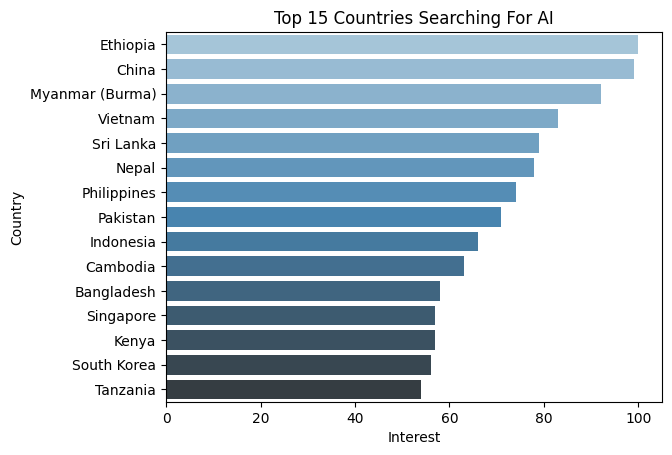

In [4]:
region_data = pytreands.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending=False).head(15)
plt.Figure(figsize=(10,6))
sns.barplot(x=region_data[keyword], y=region_data.index, palette='Blues_d')
plt.title(f"Top 15 Countries Searching For {keyword}")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# World Map


In [5]:
region_data = region_data.reset_index()

fig = px.choropleth(region_data,
                    locations='geoName',
                    locationmode='country names',
                    color=keyword,
                    title=f"Search Interest for {keyword} by Country",
                    color_continuous_scale='Blues')

fig.show()

# Time Wise Interest


In [6]:
time_df = pytreands.interest_over_time()

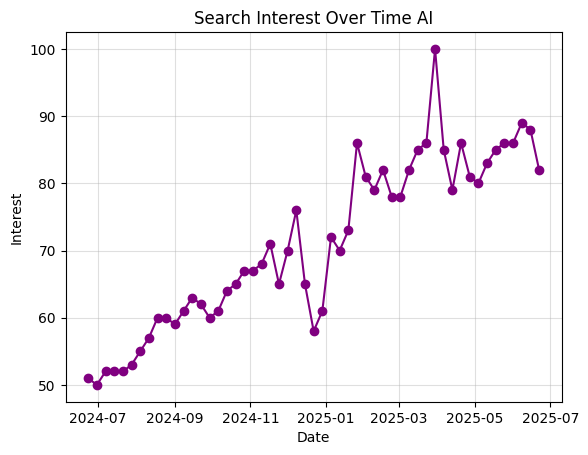

In [7]:
plt.Figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker='o', color='purple')
plt.title(f"Search Interest Over Time {keyword}")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True, alpha=0.4)
plt.show()

# Multiple Keyword Compare


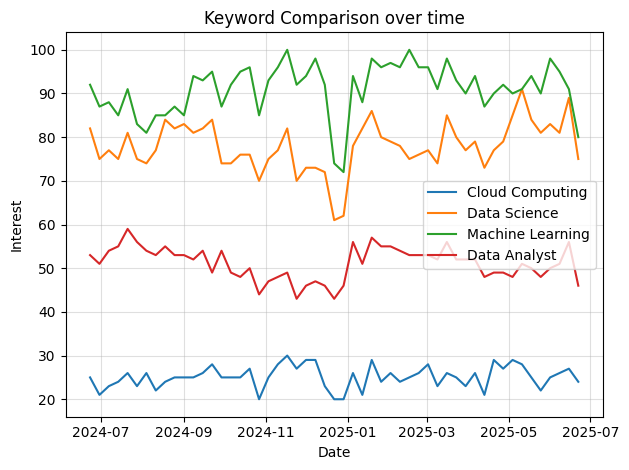

In [8]:
kw_list = ["Cloud Computing", "Data Science", "Machine Learning", "Data Analyst"]
pytreands.build_payload(kw_list, cat=0, timeframe = 'today 12-m', geo='', gprop='')

compare_df = pytreands.interest_over_time()

plt.Figure(figsize=(12,6))

for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)
    
plt.title("Keyword Comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

**Done it - Harshil Darji ✌️**
